In [52]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 데이터 가져오기

In [2]:
df_X = load_diabetes()["data"]
df_y = load_diabetes()["target"]

### 모델에 입력할 데이터

In [3]:
df_X = np.array(df_X)
df_y = np.array(df_y)

### train 데이터와 test 데이터로 분리하기

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df_X, 
    df_y, 
    test_size=0.2, 
    random_state=0
)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### 모델 준비하기

In [9]:
W = np.random.rand(10)
b = np.random.rand()

In [14]:
print("W ", W)
print("b ", b)

W  [0.2773258  0.41464982 0.88457904 0.06374213 0.18446533 0.70278672
 0.16458667 0.18162958 0.19958656 0.14758311]
b  0.8833909258160704


In [22]:
def my_model(X, W, b): 
    predictions = 0
    predictions = X @ W
    predictions += b
    return predictions

def ori_model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### 손실함수 loss 정의하기

In [23]:
def MSE(y, y_pred):
    mse = ((y - y_pred) ** 2).mean()
    return mse

In [24]:
def loss(X, W, b, y, model):
    predictions = model(X, W, b)
    loss_value = MSE(predictions, y)
    return loss_value

### 기울기를 구하는 gradient 함수 구현하기

In [69]:
def gradient(X, W, b, y, model):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

In [70]:
dW, db = gradient(X_train, W, b, y_train, my_model)
print("## my model")
print("   dW:", dW)
print("   db:", db)
dW, db = gradient(X_train, W, b, y_train, ori_model)
print("## original model")
print("   dW:", dW)
print("   db:", db)

## my model
   dW: [-0.24974358 -0.5388855   0.1901913   0.19418892  0.17787706  0.26173397
  0.06081192 -0.116408   -0.05873917  0.09444552]
   db: -306.1659112317071
## original model
   dW: [-0.24974358 -0.5388855   0.1901913   0.19418892  0.17787706  0.26173397
  0.06081192 -0.116408   -0.05873917  0.09444552]
   db: -306.1659112317071


### 하이퍼 파라미터인 학습률 설정하기 &  모델 학습하기

In [89]:
lr = 0.1
losses = []
W = np.random.rand(10)
b = np.random.rand()

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train, my_model)
    W -= lr * dW
    b -= lr * db
    loss_value = loss(X_train, W, b, y_train, my_model)
    losses.append(loss_value)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, loss_value))

Iteration 100 : Loss 5370.0880
Iteration 200 : Loss 4827.1803
Iteration 300 : Loss 4431.1782
Iteration 400 : Loss 4137.7357
Iteration 500 : Loss 3916.3851
Iteration 600 : Loss 3746.1445
Iteration 700 : Loss 3612.5209
Iteration 800 : Loss 3505.4638
Iteration 900 : Loss 3417.9688
Iteration 1000 : Loss 3345.1234
Iteration 1100 : Loss 3283.4547
Iteration 1200 : Loss 3230.4834
Iteration 1300 : Loss 3184.4188
Iteration 1400 : Loss 3143.9491
Iteration 1500 : Loss 3108.0978
Iteration 1600 : Loss 3076.1250
Iteration 1700 : Loss 3047.4594
Iteration 1800 : Loss 3021.6505
Iteration 1900 : Loss 2998.3367
Iteration 2000 : Loss 2977.2213
Iteration 2100 : Loss 2958.0573
Iteration 2200 : Loss 2940.6354
Iteration 2300 : Loss 2924.7759
Iteration 2400 : Loss 2910.3228
Iteration 2500 : Loss 2897.1392
Iteration 2600 : Loss 2885.1044
Iteration 2700 : Loss 2874.1107
Iteration 2800 : Loss 2864.0622
Iteration 2900 : Loss 2854.8726
Iteration 3000 : Loss 2846.4645
Iteration 3100 : Loss 2838.7678
Iteration 3200 : 

### test 데이터에 대한 성능 확인하기

In [118]:
prediction = my_model(X_test, W, b)
mse = loss(X_test, W, b, y_test, my_model)
mse

3451.1255718375355

### 정답 데이터와 예측한 데이터 시각화하기

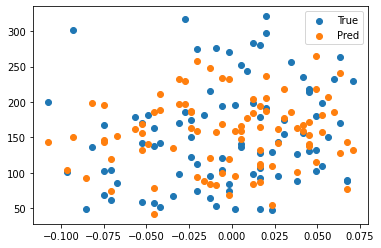

In [117]:
plt.scatter(X_test[:, 0], y_test, label="True")
plt.scatter(X_test[:, 0], prediction, label="Pred")
plt.legend()
plt.show()